<a href="https://colab.research.google.com/github/Rubic31/Linear_regression/blob/main/Math_grade_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

2 sex - student's sex (binary: "F" - female or "M" - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: "U" - urban or "R" - rural)

5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater
than 3)

6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th
grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

12 guardian - student's guardian (nominal: "mother", "father" or "other")

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 -
excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very
high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very
high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:

31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

In [ ]:
# Import the dataset.
df = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/Programming/Grade Prediction/data/student-mat.csv", sep=";")

# Print the first rows of the pandas DataFrame.
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0
mean,16.7,2.7,2.5,1.4,2.0,0.3,3.9,3.2,3.1,1.5,2.3,3.6,5.7,10.9,10.7,10.4
std,1.3,1.1,1.1,0.7,0.8,0.7,0.9,1.0,1.1,0.9,1.3,1.4,8.0,3.3,3.8,4.6
min,15.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0
25%,16.0,2.0,2.0,1.0,1.0,0.0,4.0,3.0,2.0,1.0,1.0,3.0,0.0,8.0,9.0,8.0
50%,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,4.0,11.0,11.0,11.0
75%,18.0,4.0,3.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,3.0,5.0,8.0,13.0,13.0,14.0
max,22.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,75.0,19.0,19.0,20.0


In [ ]:
df.isna().sum()

school      0
sex         0
age         0
address     0
famsize     0
           ..
health      0
absences    0
G1          0
G2          0
G3          0
Length: 33, dtype: int64

In [ ]:
feature_names = ['age',	'Medu',	'Fedu',	'traveltime',	'studytime',	'failures',	'famrel',	'freetime',	'goout',	'Dalc',	'Walc',	'health',	'absences',	'G1',	'G2',
                 'G3', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                 'nursery', 'higher', 'internet', 'romantic']
print(len(feature_names))
LABEL = 'G3'
numeric_feature_names = ['age', 'failures', 'absences', 'G1', 'G2']
categorical_feature_names = list(set(feature_names) - set(numeric_feature_names) - set([LABEL]))
print(len(numeric_feature_names))
print(len(categorical_feature_names))

33
5
27


In [ ]:
df[numeric_feature_names]

,age,failures,absences,G1,G2
0,18,0,6,5,6
1,17,0,4,5,5
2,15,3,10,7,8
3,15,0,2,15,14
4,16,0,4,6,10
...,...,...,...,...,...
390,20,2,11,9,9
391,17,0,3,14,16
392,21,3,3,10,8
393,18,0,0,11,12


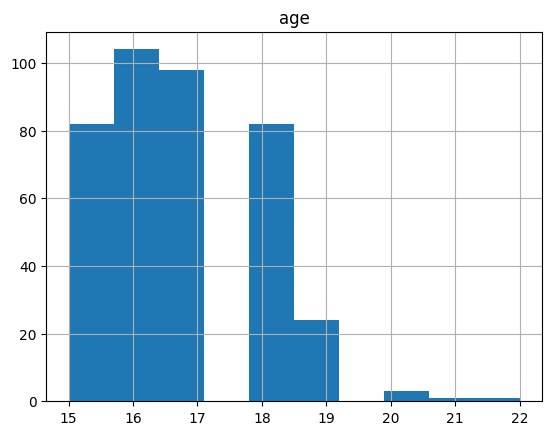

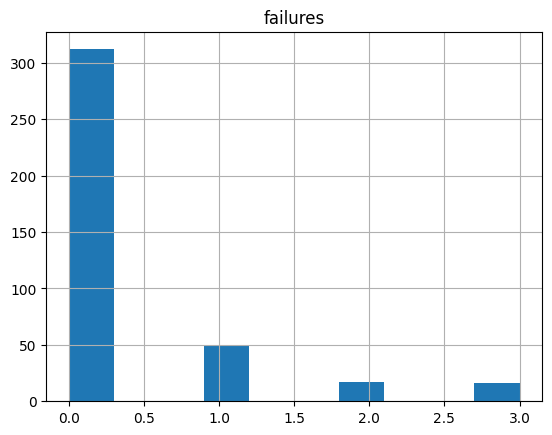

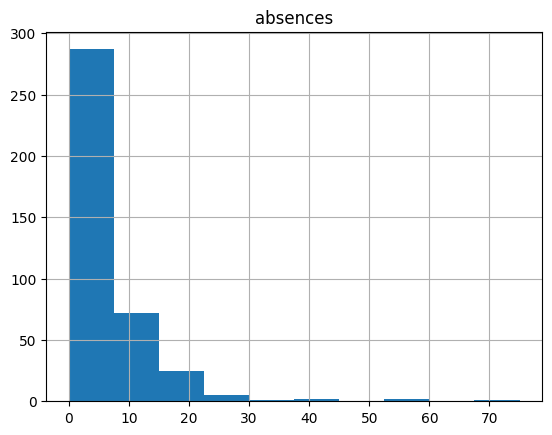

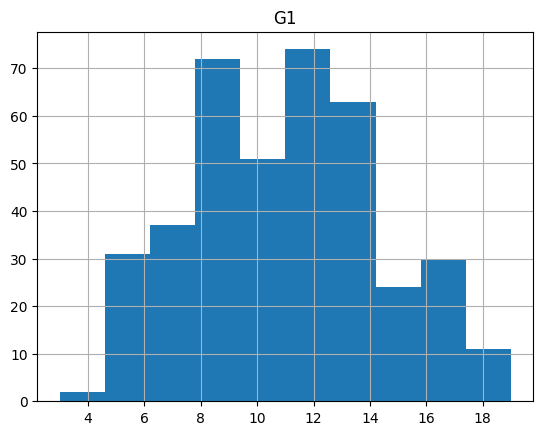

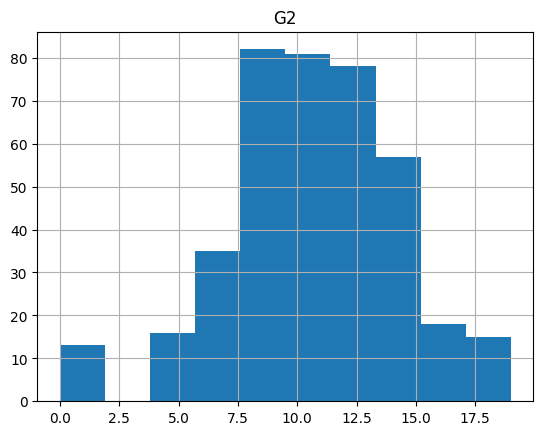

In [ ]:
for feature_name in numeric_feature_names:
  df.hist(column=feature_name)

In [ ]:
df[categorical_feature_names]

,famsup,romantic,sex,Fjob,higher,famsize,goout,Mjob,schoolsup,activities,...,paid,internet,traveltime,Walc,school,address,studytime,reason,guardian,Medu
0,no,no,F,teacher,yes,GT3,4,at_home,yes,no,...,no,no,2,1,GP,U,2,course,mother,4
1,yes,no,F,other,yes,GT3,3,at_home,no,no,...,no,yes,1,1,GP,U,2,course,father,1
2,no,no,F,other,yes,LE3,2,at_home,yes,no,...,yes,yes,1,3,GP,U,2,other,mother,1
3,yes,yes,F,services,yes,GT3,2,health,no,yes,...,yes,yes,1,1,GP,U,3,home,mother,4
4,yes,no,F,other,yes,GT3,2,other,no,no,...,yes,no,1,2,GP,U,2,home,father,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,yes,no,M,services,yes,LE3,4,services,no,no,...,yes,no,1,5,MS,U,2,course,other,2
391,no,no,M,services,yes,LE3,5,services,no,no,...,no,yes,2,4,MS,U,1,course,mother,3
392,no,no,M,other,yes,GT3,3,other,no,no,...,no,no,1,3,MS,R,1,course,other,1
393,no,no,M,other,yes,LE3,1,services,no,no,...,no,yes,3,4,MS,R,1,course,mother,3


In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns=categorical_feature_names)
print(one_hot_encoded_data)

     age  failures  absences  G1  G2  G3  famsup_no  famsup_yes  romantic_no  \
0     18         0         6   5   6   6          1           0            1   
1     17         0         4   5   5   6          0           1            1   
2     15         3        10   7   8  10          1           0            1   
3     15         0         2  15  14  15          0           1            0   
4     16         0         4   6  10  10          0           1            1   
..   ...       ...       ...  ..  ..  ..        ...         ...          ...   
390   20         2        11   9   9   9          0           1            1   
391   17         0         3  14  16  16          1           0            1   
392   21         3         3  10   8   7          1           0            1   
393   18         0         0  11  12  10          1           0            1   
394   19         0         5   8   9   9          1           0            1   

     romantic_yes  ...  reason_other  r

In [ ]:
for feature_name in one_hot_encoded_data.columns:
  if feature_name.endswith('_no'):
    one_hot_encoded_data.drop(columns=feature_name, inplace=True)
print(one_hot_encoded_data)

     age  failures  absences  G1  G2  G3  famsup_yes  romantic_yes  sex_F  \
0     18         0         6   5   6   6           0             0      1   
1     17         0         4   5   5   6           1             0      1   
2     15         3        10   7   8  10           0             0      1   
3     15         0         2  15  14  15           1             1      1   
4     16         0         4   6  10  10           1             0      1   
..   ...       ...       ...  ..  ..  ..         ...           ...    ...   
390   20         2        11   9   9   9           1             0      0   
391   17         0         3  14  16  16           0             0      0   
392   21         3         3  10   8   7           0             0      0   
393   18         0         0  11  12  10           0             0      0   
394   19         0         5   8   9   9           0             0      0   

     sex_M  ...  reason_other  reason_reputation  guardian_father  \
0     

In [ ]:
# Still should have 70 columns, 19 left to drop
one_hot_encoded_data.drop(columns=['school_MS', 'sex_F', 'address_R', 'famsize_LE3', 'Pstatus_T', 'Mjob_other', 'Fjob_other',
                                   'reason_other', 'guardian_other', 'Medu_4',	'Fedu_4',	'traveltime_4',	'studytime_4', 'famrel_5',
                                   'freetime_5',	'goout_5',	'Dalc_5',	'Walc_5',	'health_5'], inplace=True)
one_hot_encoded_data

,age,failures,absences,G1,G2,G3,famsup_yes,romantic_yes,sex_M,Fjob_at_home,...,studytime_3,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother,Medu_0,Medu_1,Medu_2,Medu_3
0,18,0,6,5,6,6,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,17,0,4,5,5,6,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,15,3,10,7,8,10,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,15,0,2,15,14,15,1,1,0,0,...,1,0,1,0,0,1,0,0,0,0
4,16,0,4,6,10,10,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,11,9,9,9,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
391,17,0,3,14,16,16,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
392,21,3,3,10,8,7,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
393,18,0,0,11,12,10,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
print("school =", df['school'].unique()) # 1
print("sex =", df['sex'].unique()) # 2
print("address =", df['address'].unique()) # 4
print("famsize =", df['famsize'].unique()) # 5
print("Pstatus =", df['Pstatus'].unique()) # 6
print("Mjob =", df['Mjob'].unique()) # 9
print("Fjob =", df['Fjob'].unique()) # 10
print("reason =", df['reason'].unique()) # 11
print("guardian =", df['guardian'].unique()) # 12
print("schoolsup =", df['schoolsup'].unique()) # 16
print("famsup =", df['famsup'].unique()) # 17
print("paid =", df['paid'].unique()) # 18
print("activities =", df['activities'].unique()) # 19
print("nursery =", df['nursery'].unique()) # 20
print("higher =", df['higher'].unique()) # 21
print("internet =", df['internet'].unique()) # 22
print("romantic =", df['romantic'].unique()) # 23

school = ['GP' 'MS']
sex = ['F' 'M']
address = ['U' 'R']
famsize = ['GT3' 'LE3']
Pstatus = ['A' 'T']
Mjob = ['at_home' 'health' 'other' 'services' 'teacher']
Fjob = ['teacher' 'other' 'services' 'health' 'at_home']
reason = ['course' 'other' 'home' 'reputation']
guardian = ['mother' 'father' 'other']
schoolsup = ['yes' 'no']
famsup = ['no' 'yes']
paid = ['no' 'yes']
activities = ['no' 'yes']
nursery = ['yes' 'no']
higher = ['yes' 'no']
internet = ['no' 'yes']
romantic = ['no' 'yes']


In [ ]:
train_df = one_hot_encoded_data.sample(frac=0.8, random_state=25)
test_df = one_hot_encoded_data.drop(train_df.index)

print(f"No. of training examples: {train_df.shape[0]}")
print(f"No. of testing examples: {test_df.shape[0]}")

No. of training examples: 316
No. of testing examples: 79


In [ ]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,316.0,16.7,1.3,15.0,16.0,17.0,18.0,22.0
failures,316.0,0.3,0.8,0.0,0.0,0.0,0.0,3.0
absences,316.0,5.9,8.6,0.0,0.0,4.0,8.0,75.0
G1,316.0,10.8,3.3,3.0,8.0,10.0,13.0,19.0
G2,316.0,10.7,3.6,0.0,8.0,11.0,13.0,19.0
...,...,...,...,...,...,...,...,...
guardian_mother,316.0,0.7,0.5,0.0,0.0,1.0,1.0,1.0
Medu_0,316.0,0.0,0.1,0.0,0.0,0.0,0.0,1.0
Medu_1,316.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
Medu_2,316.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0


In [ ]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('G3')
test_labels = test_features.pop('G3')

In [ ]:
g1 = np.array(train_features['G1'])

g1_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
g1_normalizer.adapt(g1)

In [ ]:
G1_model = tf.keras.Sequential([
    g1_normalizer,
    tf.keras.layers.Dense(units=1)
])

G1_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
G1_model.predict(g1[:10])

1/1 [==============================] - 0s 117ms/step


array([[ 0.659178  ],
       [ 0.659178  ],
       [-0.7724388 ],
       [ 0.30127376],
       [ 1.0170822 ],
       [ 1.3749864 ],
       [-0.7724388 ],
       [-0.41453466],
       [ 0.30127376],
       [-0.7724388 ]], dtype=float32)

In [ ]:
G1_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = G1_model.fit(
    train_features['G1'],
    train_labels,
    epochs=100,
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 10.1444 - val_loss: 10.3516
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 9.3885 - val_loss: 9.5875
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 8.6444 - val_loss: 8.8164
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 7.8784 - val_loss: 8.0478
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 7.1282 - val_loss: 7.2697
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 6.3479 - val_loss: 6.5015
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 5.5855 - val_loss: 5.7259
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 4.8398 - val_loss: 4.9406
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 4.0624 - val_loss: 4.1637
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 3.3555 - val_loss: 3.4427
Epoch 11/100
8/8 [========

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [G3]')
  plt.legend()
  plt.grid(True)

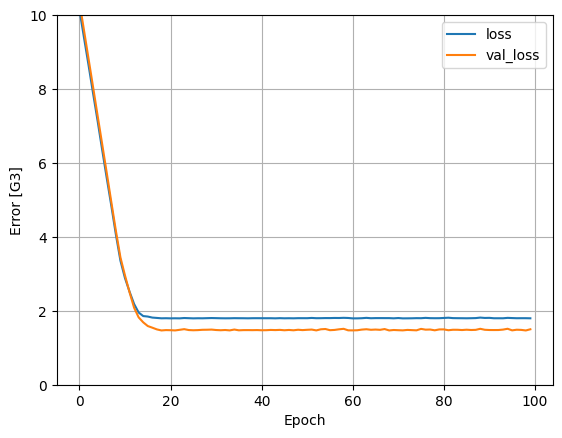

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['G1_model'] = G1_model.evaluate(
    test_features['G1'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(0.0, 20.0, 200)
y = G1_model.predict(x)

7/7 [==============================] - 0s 2ms/step


In [ ]:
def plot_G1(x, y):
  plt.scatter(train_features['G1'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('G1')
  plt.ylabel('G3')
  plt.legend()

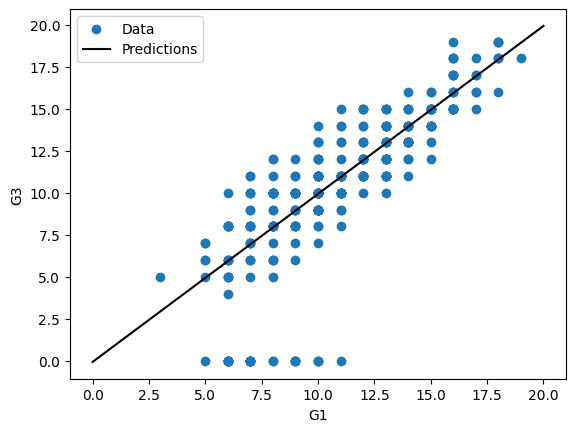

In [ ]:
plot_G1(x, y)

Here ends Predicting using only G1
Now let's try with G1 and G2

In [ ]:
g2g3_normalizer = tf.keras.layers.Normalization(axis=-1)
g2g3_normalizer.adapt(np.array(train_features[['G1', 'G2']]))

In [ ]:
G2G3_model = tf.keras.Sequential([
    g2g3_normalizer,
    tf.keras.layers.Dense(units=1)
])

In [ ]:
G2G3_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = G2G3_model.fit(
    train_features[['G1', 'G2']],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 3.85 s, sys: 158 ms, total: 4.01 s
Wall time: 5.52 s


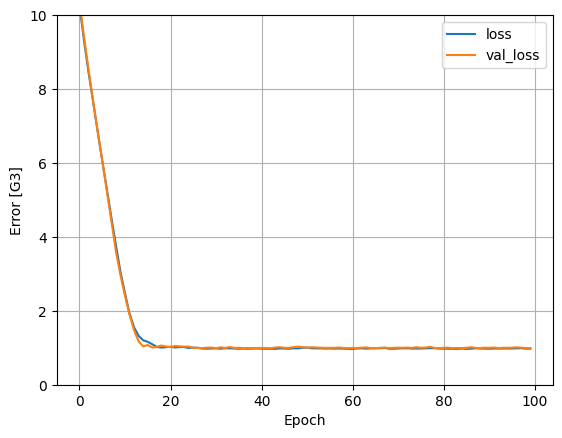

In [ ]:
plot_loss(history)

In [ ]:
test_results['G2G3_model'] = G2G3_model.evaluate(
    test_features[['G1', 'G2']], test_labels, verbose=0)

In [ ]:
x = tf.linspace(0.0, 20.0, 200)
x = tf.linspace([0.0, 0.0], [20.0, 20.0], 200, axis=0)
y = G2G3_model.predict(x)

7/7 [==============================] - 0s 2ms/step


In [ ]:
#print(x[0][:][:][0])
#print(y)

tf.Tensor(0.0, shape=(), dtype=float32)


In [ ]:
def plot_G1G2(x, y):
  plt.scatter(train_features[['G1', 'G2']], train_labels, label='Data')
  plt.plot(x[0][0], y, color='k', label='Predictions')
  plt.xlabel('G1 G2')
  plt.ylabel('G3')
  plt.legend()

In [ ]:
#plot_G1G2(x, y)

Now let's try with all features

In [ ]:
all_normalizer = tf.keras.layers.Normalization(axis=-1)
all_normalizer.adapt(np.array(train_features))

In [ ]:
all_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(units=1)
])

In [ ]:
all_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = all_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 4.02 s, sys: 168 ms, total: 4.19 s
Wall time: 5.53 s


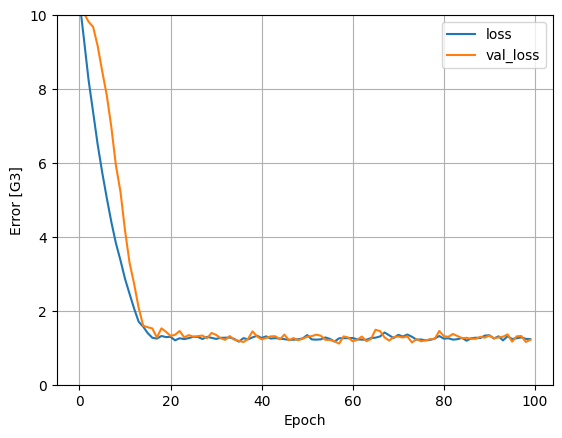

In [ ]:
plot_loss(history)

In [ ]:
test_results['all_model'] = all_model.evaluate(
    test_features, test_labels, verbose=0)

Now let's try without G1 and G2, look for other correlations

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

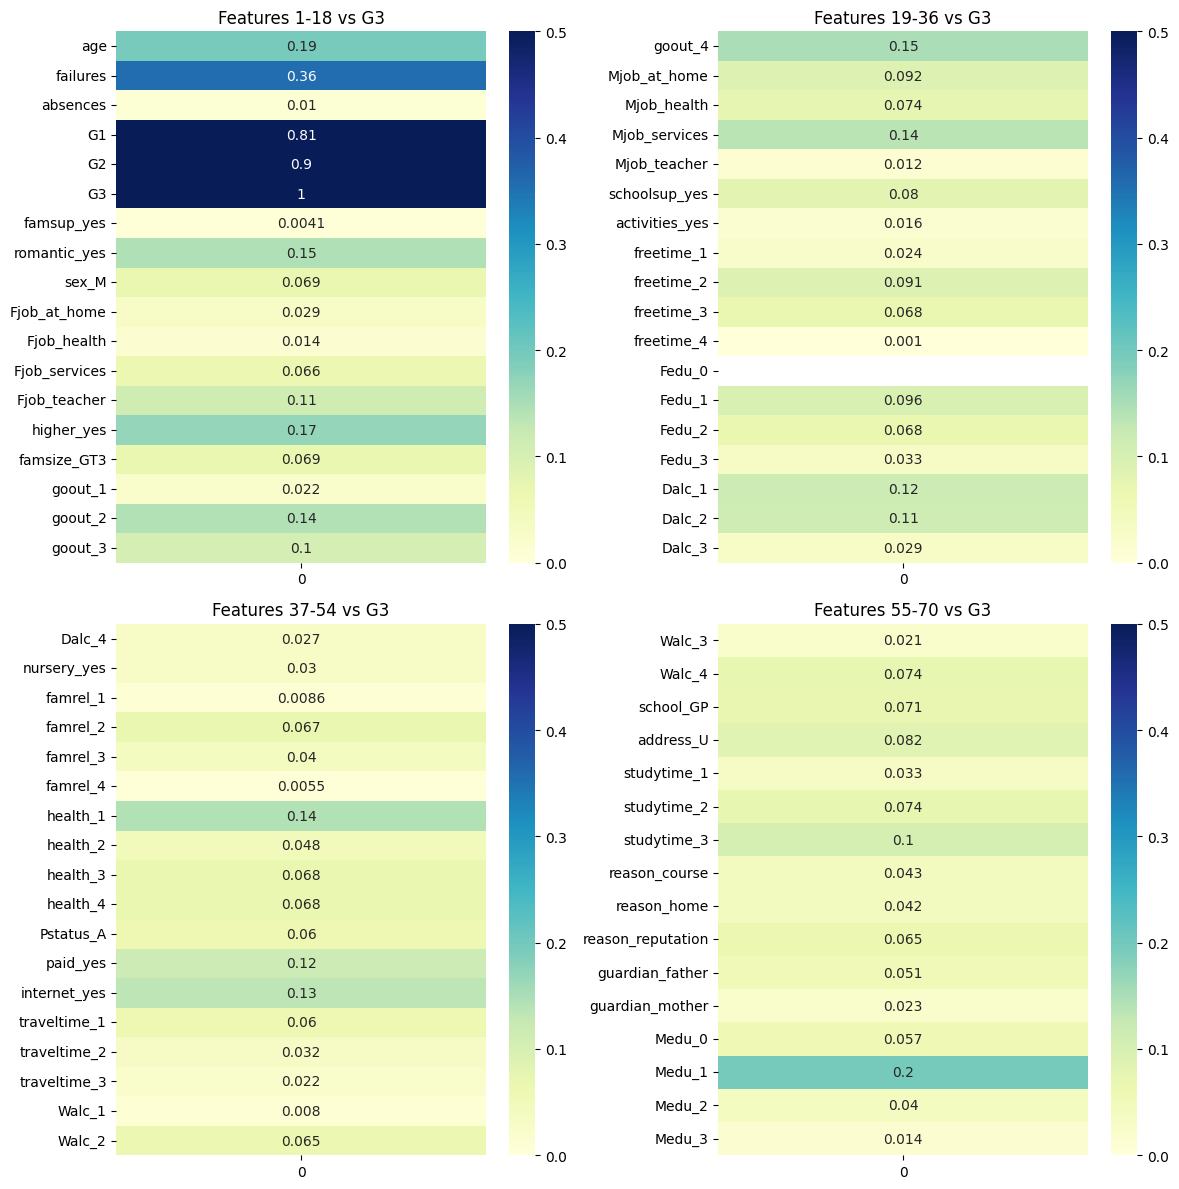

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Extract G3 from train_df
g3 = train_df['G3']

# Divide the heatmap into subplots and compare to G3
sb.heatmap(train_df.iloc[:, :18].corrwith(g3).abs().to_frame(), cmap="YlGnBu", annot=True, ax=ax[0, 0], vmin=0, vmax=0.5)
ax[0, 0].set_title("Features 1-18 vs G3")

sb.heatmap(train_df.iloc[:, 18:36].corrwith(g3).abs().to_frame(), cmap="YlGnBu", annot=True, ax=ax[0, 1], vmin=0, vmax=0.5)
ax[0, 1].set_title("Features 19-36 vs G3")

sb.heatmap(train_df.iloc[:, 36:54].corrwith(g3).abs().to_frame(), cmap="YlGnBu", annot=True, ax=ax[1, 0], vmin=0, vmax=0.5)
ax[1, 0].set_title("Features 37-54 vs G3")

sb.heatmap(train_df.iloc[:, 54:].corrwith(g3).abs().to_frame(), cmap="YlGnBu", annot=True, ax=ax[1, 1], vmin=0, vmax=0.5)
ax[1, 1].set_title("Features 55-70 vs G3")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

*   alright predictors: age, romantic, higher, gout
*   good predictors: failures, Medu

In [ ]:
train_df[['Fedu_0', 'Fedu_1', 'Fedu_2', 'Fedu_3']].describe()

,Fedu_0,Fedu_1,Fedu_2,Fedu_3
count,316.0,316.0,316.0,316.0
mean,0.0,0.2,0.3,0.3
std,0.0,0.4,0.5,0.4
min,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0
75%,0.0,0.0,1.0,1.0
max,0.0,1.0,1.0,1.0


In [ ]:
df['Fedu'].value_counts()

2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64

Let's try predicting on failures, Medu age, romantic, higher and gout

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [G3]']).T

,Mean absolute error [G3]
G1_model,2.0
G2G3_model,0.9
all_model,9319.8
